In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
import numpy as np
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)
print(X.shape, y.shape)

(70000, 784) (70000,)


<ipython-input-3-7b54164c84c8>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


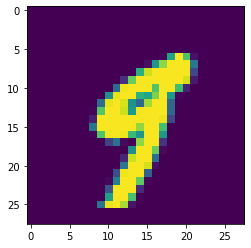

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X.values[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.show()

9

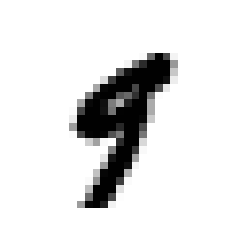

In [9]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=matplotlib.cm.binary)
    plt.axis('off') #눈금 숨김

plot_digit(X.values[36000])
y[36000]

In [50]:
# 학습용 6만, 검증용 1만
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
#온라인학습 - 1개의 샘플
#미니배치학습 - mini batch로 나누어서 학습
#배치학습 - 모든 샘플
#확률적 경사하강법 : 무작위로 1개의 데이터를 추출하여 기울기 계산,
# 빠르게 최적점을 찾을 수 있는 알고리즘

In [13]:
import numpy as np

shuffle_index = np.random.permutation(60000) #인덱스 셔플
X_train, y_train = X_train.values[shuffle_index], y_train[shuffle_index]

In [14]:
#이진 분류기
# 숫자 5만 선정

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [28]:
#확률적 경사하강법 분류모형(온라인학습)
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=100, random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=100, random_state=42)

In [29]:
sgd_clf.predict([some_digit]) #값이 5인가?

array([False])

In [30]:
#교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy') #cv=n : 교차검증횟수

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.95445, 0.9263 , 0.9543 ])

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
#클래스 비율이 유지되는 교차검증
skfolds = StratifiedKFold(n_splits=3) #class 비율을 일정하게

for train_index, test_index in skfolds.split(X_train, y_train_5):
    #분류모형복제
    clone_clf = clone(sgd_clf)
    #학습용, 검증용 구분
    X_train_folds = X_train[train_index] #오류 출력시 .values 추가
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    #학습
    clone_clf.fit(X_train_folds, y_train_folds)
    #분류
    y_pred = clone_clf.predict(X_test_folds)
    #정확도
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.71375


C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.90585
0.90855


C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
# 클래스 비율이 유지되는 교차검증
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    #분류모형을 복제(데이터는 복제하지 않음)
    clone_clf = clone(sgd_clf)
    #학습용, 검증용 구분
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    #학습
    clone_clf.fit(X_train_folds, y_train_folds)
    #분류
    y_pred = clone_clf.predict(X_test_folds)
    #정확도
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.71375


C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.90585
0.90855


C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [36]:
# 모든 예측 결과를 False로 리턴하는 테스트 클래스
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
never_5_clf = Never5Classifier()
print(never_5_clf.predict(X_train))
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


array([0.9051 , 0.9111 , 0.91275])

In [38]:
#다중분류 P9
# 다중분류를 위해 모든 데이터를 학습에 사용
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([3])

In [39]:
#판별함수 확인, 클래스별로 10개의 점수가 출력됨
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

#가장 높은 점수 출력
print(np.argmax(some_digit_scores))
# 라벨(클래스) 리스트
print(sgd_clf.classes_)
# 분류한 라벨 이름
print(sgd_clf.classes_[5])

[[-42247.30062347 -23220.42325326 -43670.18059802  -1230.06257662
   -7186.71716687 -18230.14798516 -47733.73171091 -17318.47031007
  -24608.11264815  -4187.83682769]]
3
[0 1 2 3 4 5 6 7 8 9]
5


In [49]:
len(y_test)

60000

In [51]:
#일대다전략과 일대일전략
#일대다전략: 각 분류기의 결정점수 중에서 가장 높은 것을 선택하려는 전략
#일대일전략: 0과1, 0과2 등으로 각 숫자의 조합마다 여러개의모형을 만들어서 가장 성능이 좋은 모형을 채택(SVM)
from sklearn.multiclass import OneVsOneClassifier #일대일전략
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

len(ovo_clf.estimators_)
pred = ovo_clf.predict(X_test)
np.mean(pred == y_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve

0.9077

In [52]:
from sklearn.multiclass import OneVsRestClassifier #일대다전략
ovr_clf = OneVsRestClassifier(SGDClassifier(max_iter=5, random_state=10))
ovr_clf.fit(X_train, y_train)

len(ovr_clf.estimators_) #분류기 개수
pred = ovr_clf.predict(X_test)
np.mean(pred == y_test)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve

0.8645

In [53]:
#다중 레이블 분류
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) #7,8,9
y_train_odd = (y_train % 2 == 1)#홀수
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [54]:
knn_clf.predict([some_digit]) # 7,8,9에 해당하고 홀수이다.

array([[ True,  True]])

In [55]:
#데이터 증식 P12
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
import numpy as np
X, y = mnist['data'], mnist['target']
y = y.astype(np.int)
print(X.shape, y.shape)

(70000, 784) (70000,)


<ipython-input-56-7b54164c84c8>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


In [57]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [59]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.values[shuffle_index], y_train[shuffle_index]

In [60]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28)) #2차원으로 변환
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape([-1]) # 1차원으로 리턴

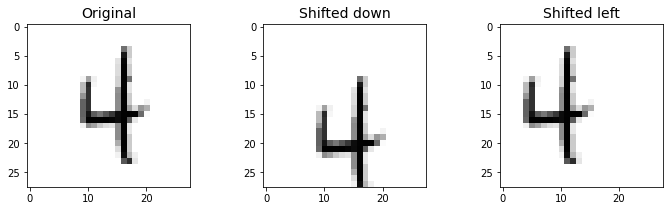

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

image = X_train[70]
shifted_image_down = shift_image(image, 0, 5) # 아래로 5픽셀
shifted_image_left = shift_image(image, -5, 0) # 왼쪽으로 5픽셀

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original', fontsize=14)
plt.imshow(image.reshape(28, 28), cmap='Greys')
plt.subplot(132)
plt.title('Shifted down', fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), cmap='Greys')
plt.subplot(133)
plt.title('Shifted left', fontsize=14)
plt.imshow(shifted_image_left.reshape(28,28), cmap='Greys')
plt.show()

In [64]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
for dx, dy in ((1,0), (-1,0), (0,1), (0,-1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)


In [66]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train_augmented[:1000], y_train_augmented[:1000])

KNeighborsClassifier(n_neighbors=1)

In [70]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test[:1000])
accuracy_score(y_test[:1000], y_pred[:1000])

0.821